## Portfolio Analysis and Efficient Frontier

In [1]:
# Importing necessary libraries for analysis, processing and visualization

# libraries for analysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Statistics
import scipy.stats as sc
from scipy.stats import norm

In [2]:
plt.style.use('fivethirtyeight')
np.random.seed(777)

%matplotlib inline
plt.rcParams["figure.figsize"] = [14, 7]

In [3]:
# Reading data 
# These stocks are part of our portfolio and the analysis is to be performed 
# on these stocks

gs = pd.read_csv(r'C:\Users\Tejas\Downloads\SelfPy\Efficient Frontier\data\GS.csv', parse_dates = True, index_col = 0)[['Close']] 
jpm = pd.read_csv(r'C:\Users\Tejas\Downloads\SelfPy\Efficient Frontier\data\JPM.csv', parse_dates = True, index_col = 0)[['Close']]
fb = pd.read_csv(r'C:\Users\Tejas\Downloads\SelfPy\Efficient Frontier\data\FB.csv', parse_dates = True, index_col = 0)[['Close']]
google = pd.read_csv(r'C:\Users\Tejas\Downloads\SelfPy\Efficient Frontier\data\GOOG.csv', parse_dates = True, index_col = 0)[['Close']]
mcst = pd.read_csv(r'C:\Users\Tejas\Downloads\SelfPy\Efficient Frontier\data\MSFT.csv', parse_dates = True, index_col = 0)[['Close']]
amazon = pd.read_csv(r'C:\Users\Tejas\Downloads\SelfPy\Efficient Frontier\data\AMZN.csv', parse_dates = True, index_col = 0)[['Close']]
apple = pd.read_csv(r'C:\Users\Tejas\Downloads\SelfPy\Efficient Frontier\data\AAPL.csv', parse_dates = True, index_col = 0)[['Close']]
tesla = pd.read_csv(r'C:\Users\Tejas\Downloads\SelfPy\Efficient Frontier\data\TSLA.csv', parse_dates = True, index_col = 0)[['Close']]
toyota = pd.read_csv(r'C:\Users\Tejas\Downloads\SelfPy\Efficient Frontier\data\TM.csv', parse_dates = True, index_col = 0)[['Close']]

In [4]:
gs.head()

Close
Date                  
2015-09-14  183.940002
2015-09-15  187.449997
2015-09-16  188.639999
2015-09-17  186.449997
2015-09-18  180.940002

In [5]:
# Close Prices of Portfolio Stocks from Sept 2015 - Sept 2020

portfolio = pd.concat([gs, jpm, fb, google, mcst, amazon, apple, tesla, toyota], axis = 1)
portfolio.columns = ['GS', 'JP.MORGAN', 'FB', 'GOOGLE', 'MICROSOFT', 'AMZN', 'AAPL', 'TSLA', 'TOYOTA']
portfolio.head()

GS  JP.MORGAN         FB      GOOGLE  MICROSOFT  \
Date                                                                  
2015-09-14  183.940002  62.380001  92.309998  623.239990  43.040001   
2015-09-15  187.449997  63.580002  92.900002  635.140015  43.980000   
2015-09-16  188.639999  64.139999  93.449997  635.979980  44.299999   
2015-09-17  186.449997  62.650002  94.339996  642.900024  44.250000   
2015-09-18  180.940002  60.939999  94.400002  629.250000  43.480000   

                  AMZN       AAPL       TSLA      TOYOTA  
Date                                                      
2015-09-14  521.380005  28.827499  50.638000  116.349998  
2015-09-15  522.369995  29.070000  50.714001  119.959999  
2015-09-16  527.390015  29.102501  52.450001  122.000000  
2015-09-17  538.869995  28.480000  52.414001  121.239998  
2015-09-18  540.260010  28.362499  52.124001  118.820000

In [6]:
#portfolio.plot(figsize = (21,10), title = 'Price change in stocks from September 2015- September 2020')

In [7]:
fig = px.line(portfolio, x=portfolio.index, y=portfolio.columns, title = 'Price change of stocks in our Portfolio from Sept 2015 - Sept 2020')
fig.show()

### Calculating Volatility and Returns

In [8]:
# Daily Percentage Returns

stock_returns = portfolio.pct_change(1)
stock_returns = stock_returns.dropna()
stock_returns

GS  JP.MORGAN        FB    GOOGLE  MICROSOFT      AMZN  \
Date                                                                       
2015-09-15  0.019082   0.019237  0.006392  0.019094   0.021840  0.001899   
2015-09-16  0.006348   0.008808  0.005920  0.001322   0.007276  0.009610   
2015-09-17 -0.011609  -0.023230  0.009524  0.010881  -0.001129  0.021768   
2015-09-18 -0.029552  -0.027295  0.000636 -0.021232  -0.017401  0.002579   
2015-09-21  0.013319   0.008369  0.012182  0.009837   0.014489  0.015048   
...              ...        ...       ...       ...        ...       ...   
2020-09-04  0.016284   0.021613 -0.028820 -0.030941  -0.014036 -0.021787   
2020-09-08 -0.040106  -0.034776 -0.040922 -0.036863  -0.054096 -0.043944   
2020-09-09 -0.001284   0.009508  0.009441  0.016034   0.042584  0.037707   
2020-09-10 -0.010929  -0.010310 -0.020568 -0.016018  -0.028018 -0.028605   
2020-09-11  0.004550   0.012421 -0.005521 -0.007376  -0.006525 -0.018547   

                AAPL      TSLA    TOYOTA  
Date                                      
2015-09-15  0.008412  0.001501  0.031027  
2015-09-16  0.001118  0.034231  0.017006  
2015-09-17 -0.021390 -0.000686 -0.006230  
2015-09-18 -0.004126 -0.005533 -0.019960  
2015-09-21  0.015513  0.013736  0.005134  
...              ...       ...       ...  
2020-09-04  0.000662  0.027813  0.024779  
2020-09-08 -0.067295 -0.210628 -0.014568  
2020-09-09  0.039887  0.109234 -0.000762  
2020-09-10 -0.032646  0.013815 -0.007245  
2020-09-11 -0.013129  0.003716  0.008911  

[1258 rows x 9 columns]

In [9]:
# Daily Returns Plot

#stock_returns.plot(kind = 'line', figsize = (21,10))

In [10]:
fig = px.line((1+stock_returns).cumprod(), x=stock_returns.index, y=stock_returns.columns, title = 'Cumulative Returns of stocks in our Portfolio from Sept 2015 - Sept 2020')
fig.show()

<i> Clearly, TSLA has the best returns as compared to other stocks in our portfolio. It is also because of high volatility of TSLA

In [11]:
# Daily Volatility

daily_vol = stock_returns.std()

In [12]:
monthly_vol = daily_vol*np.sqrt(21)
monthly_vol

GS           0.091058
JP.MORGAN    0.085963
FB           0.093283
GOOGLE       0.075645
MICROSOFT    0.080163
AMZN         0.086586
AAPL         0.085292
TSLA         0.163150
TOYOTA       0.059087
dtype: float64

In [13]:
# Annualized Volatility
ann_vol = daily_vol*np.sqrt(252)
ann_vol

GS           0.315435
JP.MORGAN    0.297786
FB           0.323142
GOOGLE       0.262043
MICROSOFT    0.277693
AMZN         0.299943
AAPL         0.295459
TSLA         0.565168
TOYOTA       0.204685
dtype: float64

<i> As we can see here, Tesla is the most volatile stock in our portfolio (Annual Vol = 56.516%)
and the least volatile is Toyota (Annual Vol = 20.468%). </i>

In [14]:
# Annualized Compounded Return

ann_returns = ((1+stock_returns).prod()**(252/stock_returns.shape[0])) - 1
ann_returns

GS           0.017845
JP.MORGAN    0.101494
FB           0.236722
GOOGLE       0.195644
MICROSOFT    0.365775
AMZN         0.430677
AAPL         0.312410
TSLA         0.491615
TOYOTA       0.024573
dtype: float64

In [15]:
# Annualized Mean Return

(1 + stock_returns.mean())**(252) - 1

GS           0.069757
JP.MORGAN    0.151388
FB           0.303421
GOOGLE       0.237412
MICROSOFT    0.419311
AMZN         0.496085
AAPL         0.370948
TSLA         0.748562
TOYOTA       0.046247
dtype: float64

<i> As we can see here, Tesla has the highest annualized return in our portfolio (Ann Return = 49.161%) but it is also the most volatile (high risk high returns) and Goldman Sachs has the least annualized return (Ann Return = 1.784%) (low risk low returns). 

In [16]:
fig=px.line(stock_returns, x=stock_returns.index, y=stock_returns.columns, title='Daily Returns')
fig.show()

<i> We can also see from the above plot that Tesla (green) has the highest volatility.   

### Calculating Drawdown

STEPS: 
1. Compute a wealth index
2. Compute previous peaks
3. Compute drawdown - which is the wealth value of as % of prev peaks

<b><i> A drawdown refers to how much an investment or trading account is down from the peak before it recovers back to the peak.

In [17]:
def drawdown(return_series: pd.Series):
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})


In [18]:
wealth_index = 1000*(1+stock_returns).cumprod()
previous_peaks = wealth_index.cummax()
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.min()

GS          -0.506292
JP.MORGAN   -0.439861
FB          -0.429609
GOOGLE      -0.307901
MICROSOFT   -0.282353
AMZN        -0.341038
AAPL        -0.387297
TSLA        -0.606265
TOYOTA      -0.252034
dtype: float64

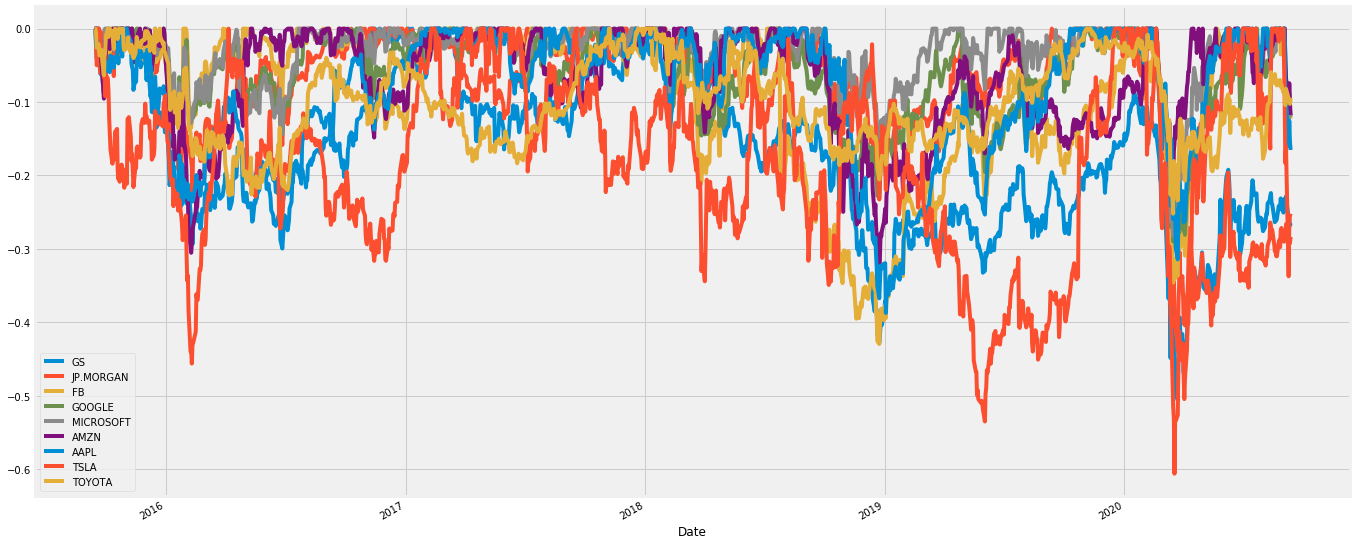

In [19]:
drawdown.plot(figsize = (21,10))

### Calculating VaR and CVaR

VaR (Value at Risk) is a statistical measure of risk that measures the maximum loss expected over a given period of time at a certain confidence level. It is better than Volatility because Volatility also accounts for the positive jump of a stock's price and investors aren't distressed with the positive jump but are concerned with how much loss at maximum can be expected from a given equity. 

A VaR statistic has three components: a time period, a confidence level and a loss amount (or loss percentage). Keep these three parts in mind as we give some examples of variations of the question that VaR answers:

-What is the most I can—with a 95% or 99% level of confidence—expect to lose in dollars over the next month?

-What is the maximum percentage I can—with 95% or 99% confidence—expect to lose over the next year?

<i> There are 4 methods for calculating VaR:
    1. Historic VaR (Non-Parametric)
    2. Variance-Covariance (Parametric Gaussian)
    3. Parametric Non-Gaussian
    4. Cornish-Fisher (Semi-Parametric) # most imp

Checking if we have a normal distribution.
For a normal distribution:

1. Excess Kurtosis = 0 (K-3=0)
2. Skewness = 0
3. Jarque-Bera Test Statistic = 0

In [20]:
# Function to calculate excess kurtosis

def kurtosis(r):
    """
    Alternative to scipy.stats.kurtosis()
    Computes the kurtosis of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return (exp/sigma_r**4) - 3

# Function to calculate skewness

def skewness(r):
    demeaned_r = r - r.mean()
    sigma_r = r.std(ddof = 0)
    exp = (demeaned_r**3).mean()
    return exp/(sigma_r**3)

# Function to tell whether the distribution is normal or not

def is_normal(r, level = 0.01):
    statistic, p_value = sc.jarque_bera(r)
    return p_value > level

In [21]:
# Measuring Excess Kurtosis

kurtosis(stock_returns)

GS           12.017070
JP.MORGAN    15.985535
FB           13.323975
GOOGLE        6.863103
MICROSOFT    11.433151
AMZN          5.106179
AAPL          7.757790
TSLA          6.255340
TOYOTA        6.309375
dtype: float64

<i>Kurtosis is the measure of fatness of the tails. 

Higher Kurtosis indicate fatter tails and more number of outliers.
    


In [22]:
skewness(stock_returns)

GS           0.126502
JP.MORGAN    0.177998
FB          -0.400266
GOOGLE      -0.113310
MICROSOFT    0.123360
AMZN         0.289079
AAPL        -0.094832
TSLA         0.233348
TOYOTA       0.035741
dtype: float64

In [23]:
stock_returns.aggregate(is_normal)

GS           False
JP.MORGAN    False
FB           False
GOOGLE       False
MICROSOFT    False
AMZN         False
AAPL         False
TSLA         False
TOYOTA       False
dtype: bool

We can see here that the distribution of prices is not normal. This is almost always the case when it comes to a stock's price data.

In [24]:
# Calculating VaR using differenct methods.

def var_historic(r, level=5):
    """
    Returns the historic Value at Risk at a specified level
    i.e. returns the number such that "level" percent of the returns
    fall below that number, and the (100-level) percent are above
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")

def cvar_historic(r, level=5):
    """
    Computes the Conditional VaR of Series or DataFrame
    """
    if isinstance(r, pd.Series):
        is_beyond = r <= -var_historic(r, level=level)
        return -r[is_beyond].mean()
    elif isinstance(r, pd.DataFrame):
        return r.aggregate(cvar_historic, level=level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")

def var_gaussian(r, level=5, modified=False):
    """
    Returns the Parametric Gauusian VaR of a Series or DataFrame
    If "modified" is True, then the modified VaR is returned,
    using the Cornish-Fisher modification
    """
    # compute the Z score assuming it was Gaussian
    z = norm.ppf(level/100)
    if modified:
        # modify the Z score based on observed skewness and kurtosis
        s = skewness(r)
        k = kurtosis(r)
        z = (z +
                (z**2 - 1)*s/6 +
                (z**3 -3*z)*(k-3)/24 -
                (2*z**3 - 5*z)*(s**2)/36
            )
    return -(r.mean() + z*r.std(ddof=0))

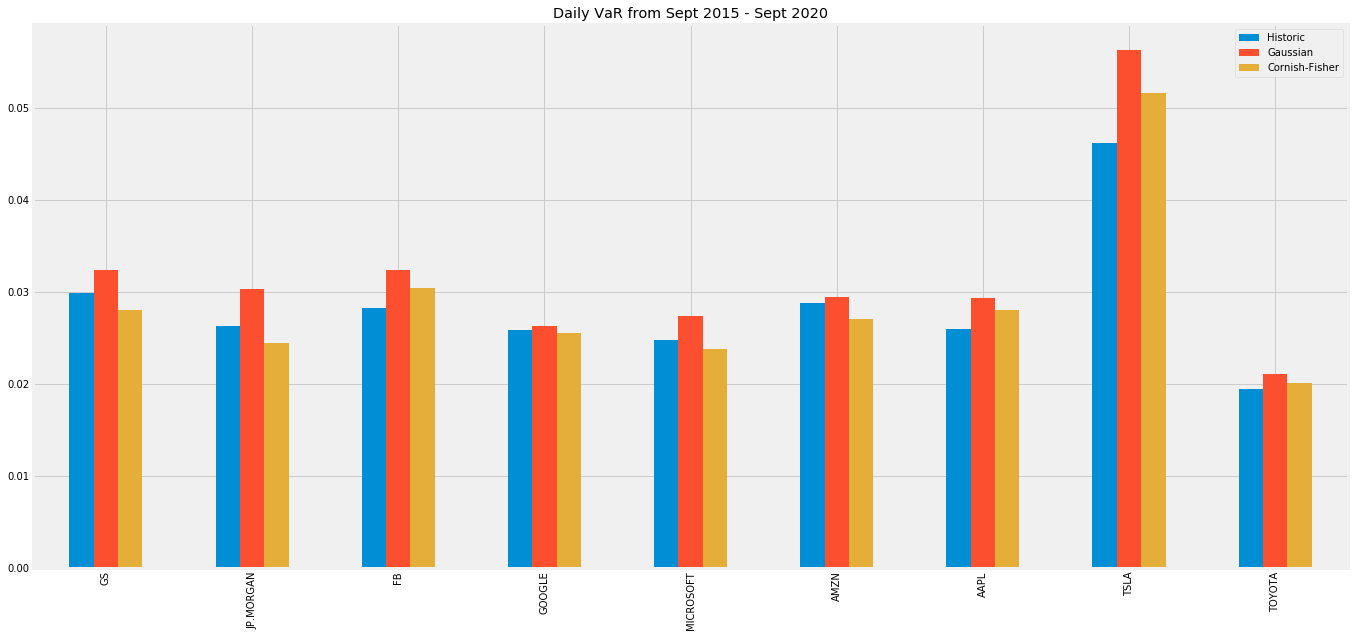

In [25]:
VaR_list = [var_historic(stock_returns), var_gaussian(stock_returns, level = 5), var_gaussian(stock_returns, level = 5, modified = True)]
comparison = pd.concat(VaR_list, axis = 1)
comparison.columns = ['Historic', 'Gaussian', 'Cornish-Fisher']
comparison.plot(kind= 'bar', figsize = (21,10), title = 'Daily VaR from Sept 2015 - Sept 2020')

In [26]:
monthly_VaR = comparison*np.sqrt(21)
monthly_VaR

Historic  Gaussian  Cornish-Fisher
GS         0.136941  0.148492        0.128628
JP.MORGAN  0.120184  0.138777        0.111860
FB         0.129522  0.148555        0.139456
GOOGLE     0.118454  0.120501        0.117023
MICROSOFT  0.113234  0.125432        0.108962
AMZN       0.131888  0.135033        0.124106
AAPL       0.118800  0.134496        0.128593
TSLA       0.211608  0.258078        0.236380
TOYOTA     0.088890  0.096329        0.091783

In [27]:
# Annual VaR
monthly_VaR*(12**.5)

Historic  Gaussian  Cornish-Fisher
GS         0.474379  0.514390        0.445580
JP.MORGAN  0.416330  0.480737        0.387493
FB         0.448678  0.514608        0.483090
GOOGLE     0.410336  0.417427        0.405380
MICROSOFT  0.392256  0.434508        0.377454
AMZN       0.456873  0.467768        0.429917
AAPL       0.411535  0.465906        0.445460
TSLA       0.733031  0.894009        0.818844
TOYOTA     0.307923  0.333694        0.317946

<I>The Historic Monthly VaR of our portfolio's individual stocks ranges from (8.88% to 21.16%) while annual VaR ranges from (30.79% (TOYOTA) to 73.30% (TSLA).
    
<i> Interpretation: For example, here, Cornish-Fisher annual VaR for TSLA is 81.88% which implies, if we invest 1000/- in TSLA, the maximum we can lose in a year is 81.88% of 1000/- which is 818.8/-.

In [28]:
cvar_historic(stock_returns)

GS           0.047136
JP.MORGAN    0.043704
FB           0.047575
GOOGLE       0.040486
MICROSOFT    0.040049
AMZN         0.043843
AAPL         0.043655
TSLA         0.079344
TOYOTA       0.029341
dtype: float64

### Sharpe Ratio

<I> Sharpe ratio is used to express the relationship between a stock's variance and its returns. That is, it determines its excess return per unit of risk. 

$$ Sharpe Ratio = \frac{R{p} - r_f}{sigma{(p)}} $$

In [29]:
# Annual Sharpe ratio over 5 years
# We have used the risk free rate here equal to 5% (annual).

daily_sharpe_ratio = ((((1+stock_returns.mean())) - 1))/(stock_returns.std())
sharpe_ratio_5yrs = daily_sharpe_ratio*(np.sqrt(252*5))
sharpe_ratio_5yrs

GS           0.478076
JP.MORGAN    1.058824
FB           1.834648
GOOGLE       1.818527
MICROSOFT    2.821652
AMZN         3.005653
AAPL         2.389254
TSLA         2.213302
TOYOTA       0.493931
dtype: float64

Sharpe Ratio >= 1 is generally considered to be good.

Toyota and Goldman Sachs have a very low Sharpe Ratio. 

## Efficient Frontier

<i> The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.

In [30]:
# Monthly Covariance of Stocks

cov = stock_returns.cov()*21
cov

GS  JP.MORGAN        FB    GOOGLE  MICROSOFT      AMZN  \
GS         0.008292   0.006773  0.003834  0.003826   0.004258  0.003094   
JP.MORGAN  0.006773   0.007390  0.003305  0.003339   0.003883  0.002433   
FB         0.003834   0.003305  0.008702  0.004886   0.004645  0.005014   
GOOGLE     0.003826   0.003339  0.004886  0.005722   0.004742  0.004462   
MICROSOFT  0.004258   0.003883  0.004645  0.004742   0.006426  0.004664   
AMZN       0.003094   0.002433  0.005014  0.004462   0.004664  0.007497   
AAPL       0.004266   0.003752  0.004510  0.004221   0.004799  0.004229   
TSLA       0.004817   0.003816  0.005028  0.004665   0.005335  0.005288   
TOYOTA     0.003049   0.002892  0.002061  0.002256   0.002436  0.001856   

               AAPL      TSLA    TOYOTA  
GS         0.004266  0.004817  0.003049  
JP.MORGAN  0.003752  0.003816  0.002892  
FB         0.004510  0.005028  0.002061  
GOOGLE     0.004221  0.004665  0.002256  
MICROSOFT  0.004799  0.005335  0.002436  
AMZN       0.004229  0.005288  0.001856  
AAPL       0.007275  0.005323  0.002274  
TSLA       0.005323  0.026618  0.002446  
TOYOTA     0.002274  0.002446  0.003491

In [31]:
stock_returns.corr()    

GS  JP.MORGAN        FB    GOOGLE  MICROSOFT      AMZN  \
GS         1.000000   0.865290  0.451310  0.555459   0.583329  0.392423   
JP.MORGAN  0.865290   1.000000  0.412106  0.513402   0.563501  0.326887   
FB         0.451310   0.412106  1.000000  0.692452   0.621122  0.620792   
GOOGLE     0.555459   0.513402  0.692452  1.000000   0.782000  0.681221   
MICROSOFT  0.583329   0.563501  0.621122  0.782000   1.000000  0.671974   
AMZN       0.392423   0.326887  0.620792  0.681221   0.671974  1.000000   
AAPL       0.549307   0.511681  0.566875  0.654277   0.701839  0.572633   
TSLA       0.324246   0.272070  0.330351  0.378032   0.407883  0.374341   
TOYOTA     0.566706   0.569419  0.373968  0.504807   0.514280  0.362780   

               AAPL      TSLA    TOYOTA  
GS         0.549307  0.324246  0.566706  
JP.MORGAN  0.511681  0.272070  0.569419  
FB         0.566875  0.330351  0.373968  
GOOGLE     0.654277  0.378032  0.504807  
MICROSOFT  0.701839  0.407883  0.514280  
AMZN       0.572633  0.374341  0.362780  
AAPL       1.000000  0.382543  0.451198  
TSLA       0.382543  1.000000  0.253777  
TOYOTA     0.451198  0.253777  1.000000

In [32]:
# A function which gives the expected return of a portfolio given the
# weights of each asset in the portfolio and their individual expected returns.

def portfolio_return(weights, er):
    
    return weights.T @ er

# @ -> matrix multiplication

In [33]:
# A function which gives the volatility of a portfolio given the
# weights of each asset in the portfolio and their covariance matrix.

def portfolio_vol(weights, covmat):
    
    return (weights.T @ covmat @ weights)**0.5

# @ -> matrix multiplication

In [34]:
from scipy.optimize import minimize

In [35]:
def minimize_vol(target_return, er, cov):
    '''
    taget_ret -> W
    '''
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),)*n
    return_is_target = {
        'type' : 'eq',
        'args' : (er,),
        'fun' : lambda weights, er : target_return - portfolio_return(weights, er)
    }
    weights_sum_to_1 = {
        'type' : 'eq',
        'fun' : lambda weights : np.sum(weights) - 1
    }
    results = minimize(portfolio_vol, init_guess,
                       args = (cov,), method = 'SLSQP',
                       options={'disp': False},
                       constraints= (return_is_target, weights_sum_to_1),
                       bounds = bounds
                      )
    return results.x

In [36]:
def optimal_weights(n_points, er, cov):
    '''
    -> list of weights to run the optimizer on to minimize the vol
    '''
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights

In [37]:
def plot_ef(n_points, er, cov):
    '''
    Plots efficient frontier for a portfolio with multiple assets 
    '''
    weights = optimal_weights(n_points, er, cov)
    rets = [portfolio_return(w, er) for w in weights]
    vols = np.array([portfolio_vol(w, cov) for w in weights])
    ef = pd.DataFrame({'Returns': rets, 'Volatility': vols})
    fig = ef.plot(x='Volatility', y='Returns', style='.-', color='green')
    
    return fig

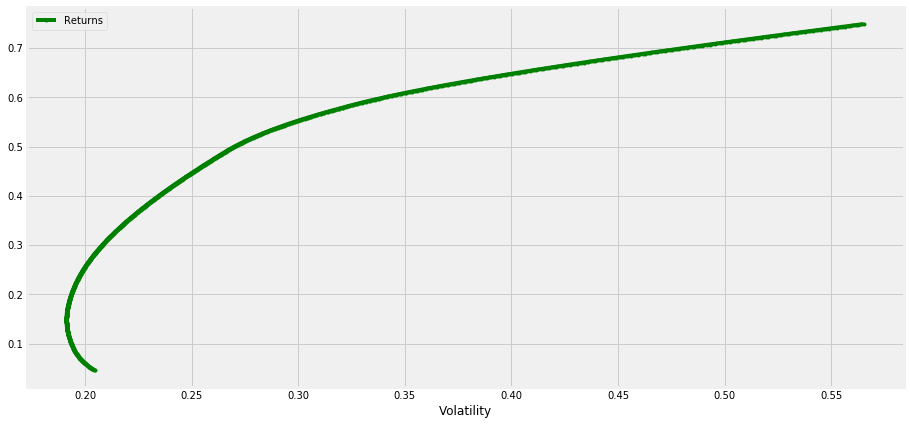

In [38]:
# Expected Yearly Returns and Volatility

plot_ef(1000, ((1+stock_returns.mean())**252)-1, cov*12)

## Calculating Max Sharpe Ratio portfolio and CML (Capital Market Line)

<b><i> Capital Market Line is the tangent line drawn from the point of the risk-free asset to the feasible region for risky assets. The point of tangency is the maximum Sharpe ratio portfolio.

In [39]:
def msr(risk_free_rate, er, cov):
    '''
    Expected returns + Risk-free rate + Cov -> W
    '''
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),)*n
    weights_sum_to_1 = {
        'type' : 'eq',
        'fun' : lambda weights : np.sum(weights) - 1
    }
    
    def neg_sharpe_ratio(weights, risk_free_rate, er, cov):
        '''
        Returns the negative sharpe ratio, given weights
        '''
        r = portfolio_return(weights, er)
        vol = portfolio_vol(weights, cov)
        return -(r - risk_free_rate)/vol
    
    results = minimize(neg_sharpe_ratio, init_guess,
                       args = (risk_free_rate, er,cov,), method = 'SLSQP',
                       options={'disp': False},
                       constraints= (weights_sum_to_1),
                        bounds = bounds
                       )
    return results.x


Text(0.5, 1.0, 'Efficient Frontier and CML')

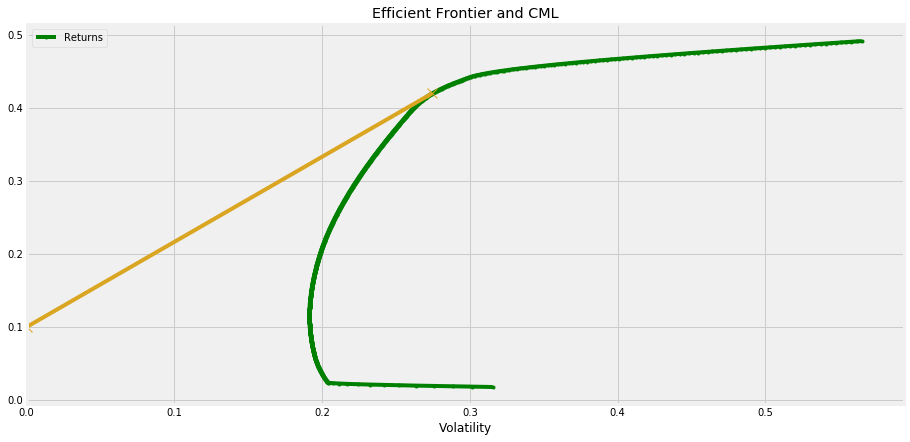

In [40]:
w_msr = msr(0.1, ann_returns, cov*12)
ret_msr = portfolio_return(w_msr, ann_returns)
vol_msr = portfolio_vol(w_msr, cov*12)
ax = plot_ef(1000, ann_returns, cov*12)

# Adding CML 

cml_x = [0, vol_msr]
cml_y = [0.1, ret_msr]
ax.plot(cml_x, cml_y, color='goldenrod', marker= 'x', markersize= 10)
ax.set_xlim(left = 0)
ax.set_title('Efficient Frontier and CML')

In [41]:
ret_msr, vol_msr
# Return and Vol of Max Sharpe Ratio Portfolio

(0.4199906845987463, 0.2744600714947523)

In [42]:
# Weights of stocks in max sharpe ratio portfolio

pd.DataFrame({'Weights': w_msr}, index=stock_returns.columns).sort_values(by='Weights')[:]

Weights
AAPL       0.000000e+00
TOYOTA     0.000000e+00
JP.MORGAN  5.723214e-18
GS         9.016329e-18
GOOGLE     5.951202e-17
FB         1.238806e-16
TSLA       1.115889e-01
MICROSOFT  2.694297e-01
AMZN       6.189813e-01

## Plotting GMV (Global min variance) on Efficient Frontier

<i><b> Global minimum variance portfolio is the portfolio which provides the lowest volatility for a given number of assets.

In [43]:
def gmv(cov):
    '''
    Returns the weight of Global Minimum Variance portfolio
    given the covariance matrix
    '''
    n = cov.shape[0]
    return msr(0, np.repeat(1, n), cov)

In [44]:
w_gmv = gmv(cov)
pd.DataFrame({'Weights': w_gmv}, index= stock_returns.columns)

Weights
GS         7.781861e-16
JP.MORGAN  2.795911e-02
FB         3.086107e-02
GOOGLE     8.583493e-02
MICROSOFT  3.065467e-16
AMZN       1.315931e-01
AAPL       4.834268e-02
TSLA       1.455096e-16
TOYOTA     6.754092e-01

Text(0.5, 1.0, 'GMV on Efficient Frontier')

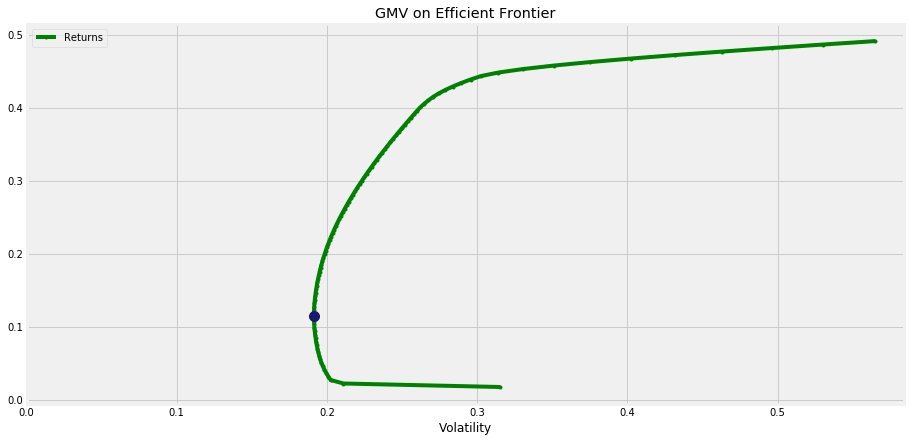

In [45]:
ax = plot_ef(100, ann_returns, cov*12)
w_gmv = gmv(cov)
ret_gmv = portfolio_return(w_gmv, ann_returns)
vol_gmv = portfolio_vol(w_gmv, cov*12)
ax.plot([vol_gmv], [ret_gmv], color = 'midnightblue', marker= 'o', markersize=10)
ax.set_xlim(left = 0)
ax.set_title('GMV on Efficient Frontier')

In [46]:
ret_gmv, vol_gmv

(0.11530988838875435, 0.19132325207375675)

## Calculating Beta

<i> Beta is a measure of volatility of the stock compared to the market as a whole. 
    For eg, if Beta of Stock A is 1.35, this implies that for 1% change in the index of the market, A changes its value by 1.35%

In [47]:
# Importing neccessary libraries for regressional analysis for calculating Beta. 

import statsmodels.api as sm
from statsmodels import regression

In [48]:
nyse = pd.read_csv(r'C:\Users\Tejas\Downloads\SelfPy\Efficient Frontier\data\NYA.csv', parse_dates = True, index_col = 0)
nyse = nyse[['Close']]
nyse.columns = ['NYSE']

In [49]:
portfolio = pd.concat([portfolio, nyse], axis=1)
portfolio

GS   JP.MORGAN          FB       GOOGLE   MICROSOFT  \
Date                                                                      
2015-09-14  183.940002   62.380001   92.309998   623.239990   43.040001   
2015-09-15  187.449997   63.580002   92.900002   635.140015   43.980000   
2015-09-16  188.639999   64.139999   93.449997   635.979980   44.299999   
2015-09-17  186.449997   62.650002   94.339996   642.900024   44.250000   
2015-09-18  180.940002   60.939999   94.400002   629.250000   43.480000   
...                ...         ...         ...          ...         ...   
2020-09-04  210.940002  103.519997  282.730011  1591.040039  214.250000   
2020-09-08  202.479996   99.919998  271.160004  1532.390015  202.660004   
2020-09-09  202.220001  100.870003  273.720001  1556.959961  211.289993   
2020-09-10  200.009995   99.830002  268.089996  1532.020020  205.369995   
2020-09-11  200.919998  101.070000  266.609985  1520.719971  204.029999   

                   AMZN        AAPL        TSLA      TOYOTA          NYSE  
Date                                                                       
2015-09-14   521.380005   28.827499   50.638000  116.349998   9988.589844  
2015-09-15   522.369995   29.070000   50.714001  119.959999  10105.870117  
2015-09-16   527.390015   29.102501   52.450001  122.000000  10236.719727  
2015-09-17   538.869995   28.480000   52.414001  121.239998  10215.540039  
2015-09-18   540.260010   28.362499   52.124001  118.820000  10031.599609  
...                 ...         ...         ...         ...           ...  
2020-09-04  3294.620117  120.959999  418.320007  133.169998  12966.139648  
2020-09-08  3149.840088  112.820000  330.209991  131.229996  12688.070313  
2020-09-09  3268.610107  117.320000  366.279999  131.130005  12885.799805  
2020-09-10  3175.110107  113.489998  371.339996  130.179993  12706.690430  
2020-09-11  3116.219971  112.000000  372.720001  131.339996           NaN  

[1259 rows x 10 columns]

In [50]:
stock_returns = portfolio.pct_change(1)[1:]
stock_returns.head()

GS  JP.MORGAN        FB    GOOGLE  MICROSOFT      AMZN  \
Date                                                                       
2015-09-15  0.019082   0.019237  0.006392  0.019094   0.021840  0.001899   
2015-09-16  0.006348   0.008808  0.005920  0.001322   0.007276  0.009610   
2015-09-17 -0.011609  -0.023230  0.009524  0.010881  -0.001129  0.021768   
2015-09-18 -0.029552  -0.027295  0.000636 -0.021232  -0.017401  0.002579   
2015-09-21  0.013319   0.008369  0.012182  0.009837   0.014489  0.015048   

                AAPL      TSLA    TOYOTA      NYSE  
Date                                                
2015-09-15  0.008412  0.001501  0.031027  0.011741  
2015-09-16  0.001118  0.034231  0.017006  0.012948  
2015-09-17 -0.021390 -0.000686 -0.006230 -0.002069  
2015-09-18 -0.004126 -0.005533 -0.019960 -0.018006  
2015-09-21  0.015513  0.013736  0.005134  0.003436

In [51]:
def beta(i):
    X = stock_returns['NYSE'].values
    Y = stock_returns[str(i)].values
    def linreg(X, Y):
        x = sm.add_constant(X)
        model = regression.linear_model.OLS(Y, x).fit()

        #x = x[:, 1]
        return model.params[0], model.params[1]
    alpha, beta = linreg(X, Y)
    return alpha, beta

In [52]:
col = np.array(portfolio.columns)
for i in col[:-1]:
    print('Alpha of '+str(i)+':', beta(str(i))[0])
    print('Beta of '+str(i)+':', beta(str(i))[1])
    print('')

Alpha of GS: -9.001978188536111e-05
Beta of GS: 1.3623085979323282

Alpha of JP.MORGAN: 0.00021101280457414906
Beta of JP.MORGAN: 1.3276457076874781

Alpha of FB: 0.0008058040037161201
Beta of FB: 0.9382101288575408

Alpha of GOOGLE: 0.0005990843653176769
Beta of GOOGLE: 0.9393273761968173

Alpha of MICROSOFT: 0.001105655994695932
Beta of MICROSOFT: 1.0851458276901857

Alpha of AMZN: 0.0013970543586491056
Beta of AMZN: 0.77265179565044

Alpha of AAPL: 0.000980822972279288
Beta of AAPL: 1.035914169651289

Alpha of TSLA: 0.001909980404624864
Beta of TSLA: 1.1805076756246462

Alpha of TOYOTA: -1.6392656698737925e-05
Beta of TOYOTA: 0.7458699608191304



For eg, here Beta(GS) is 1.36.

This implies that for every 1% change in price of the market (NYSE), the stock of GS changes its price by 1.36%. 